In [484]:
import os
from matplotlib import pyplot as plt
import numpy as np
from subprocess import Popen, PIPE

from itertools import compress
from scipy.ndimage import correlate
import math

In [738]:
pipe = Popen ("./pendulum-dimension", stdin=PIPE, stdout=PIPE, shell=True)

In [736]:
def read_results_from_pipe ():
    results = []
    
    num_lines = int(pipe.stdout.readline())
    print ("Reading %i lines" % num_lines)

    for _ in range(num_lines):
        results.append (float(pipe.stdout.readline ()))
    
    return results

def run_simu_chunk (locations):
    locations_string = list(map (lambda loc: "%f %f" % tuple(location_to_2d (loc)), locations))    
    locations_string = str(len(locations)) + "\n" + "\n".join(locations_string) + "\n"
    
    pipe.stdin.write(bytes(locations_string.encode("utf8")))
    pipe.stdin.flush ()
    
    results = read_results_from_pipe ()
    
    return dict(zip (locations, results))

def run_simu (locations):
    split_num = math.ceil(len(locations) / 512.0**2)
    arrays = np.array_split (locations, split_num)
    
    results = {}
    
    for array in arrays:
        array = list(map(tuple, array))
        results.update (run_simu_chunk (array))
    
    return results

In [688]:
pow_2 = 7
detail = 2**pow_2

locations = list(zip(np.indices ((detail,detail))[0].ravel(), np.indices ((detail,detail))[1].ravel()))
locations_string = list(map (lambda x: "%i %i" % (x[0], x[1]), locations))
locations_string = str(len(locations_string)) + "\n" + "\n".join(locations_string) + "\n"

In [689]:
locations_string

'16384\n0 0\n0 1\n0 2\n0 3\n0 4\n0 5\n0 6\n0 7\n0 8\n0 9\n0 10\n0 11\n0 12\n0 13\n0 14\n0 15\n0 16\n0 17\n0 18\n0 19\n0 20\n0 21\n0 22\n0 23\n0 24\n0 25\n0 26\n0 27\n0 28\n0 29\n0 30\n0 31\n0 32\n0 33\n0 34\n0 35\n0 36\n0 37\n0 38\n0 39\n0 40\n0 41\n0 42\n0 43\n0 44\n0 45\n0 46\n0 47\n0 48\n0 49\n0 50\n0 51\n0 52\n0 53\n0 54\n0 55\n0 56\n0 57\n0 58\n0 59\n0 60\n0 61\n0 62\n0 63\n0 64\n0 65\n0 66\n0 67\n0 68\n0 69\n0 70\n0 71\n0 72\n0 73\n0 74\n0 75\n0 76\n0 77\n0 78\n0 79\n0 80\n0 81\n0 82\n0 83\n0 84\n0 85\n0 86\n0 87\n0 88\n0 89\n0 90\n0 91\n0 92\n0 93\n0 94\n0 95\n0 96\n0 97\n0 98\n0 99\n0 100\n0 101\n0 102\n0 103\n0 104\n0 105\n0 106\n0 107\n0 108\n0 109\n0 110\n0 111\n0 112\n0 113\n0 114\n0 115\n0 116\n0 117\n0 118\n0 119\n0 120\n0 121\n0 122\n0 123\n0 124\n0 125\n0 126\n0 127\n1 0\n1 1\n1 2\n1 3\n1 4\n1 5\n1 6\n1 7\n1 8\n1 9\n1 10\n1 11\n1 12\n1 13\n1 14\n1 15\n1 16\n1 17\n1 18\n1 19\n1 20\n1 21\n1 22\n1 23\n1 24\n1 25\n1 26\n1 27\n1 28\n1 29\n1 30\n1 31\n1 32\n1 33\n1 34\n1 35\n

In [690]:
pipe.stdin.write(bytes(locations_string.encode("utf8")))

102918

In [691]:
pipe.stdin.flush ()

In [692]:
num_lines = int(pipe.stdout.readline())

print ("Reading %i lines" % num_lines)

results = []

for _ in range(num_lines):
    results.append (float(pipe.stdout.readline ()))

Reading 16384 lines


In [693]:
results

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [59]:
indices = np.array(locations)

In [60]:
arr = np.zeros ((detail, detail))

In [61]:
arr[indices[:,0], indices[:, 1]] = results

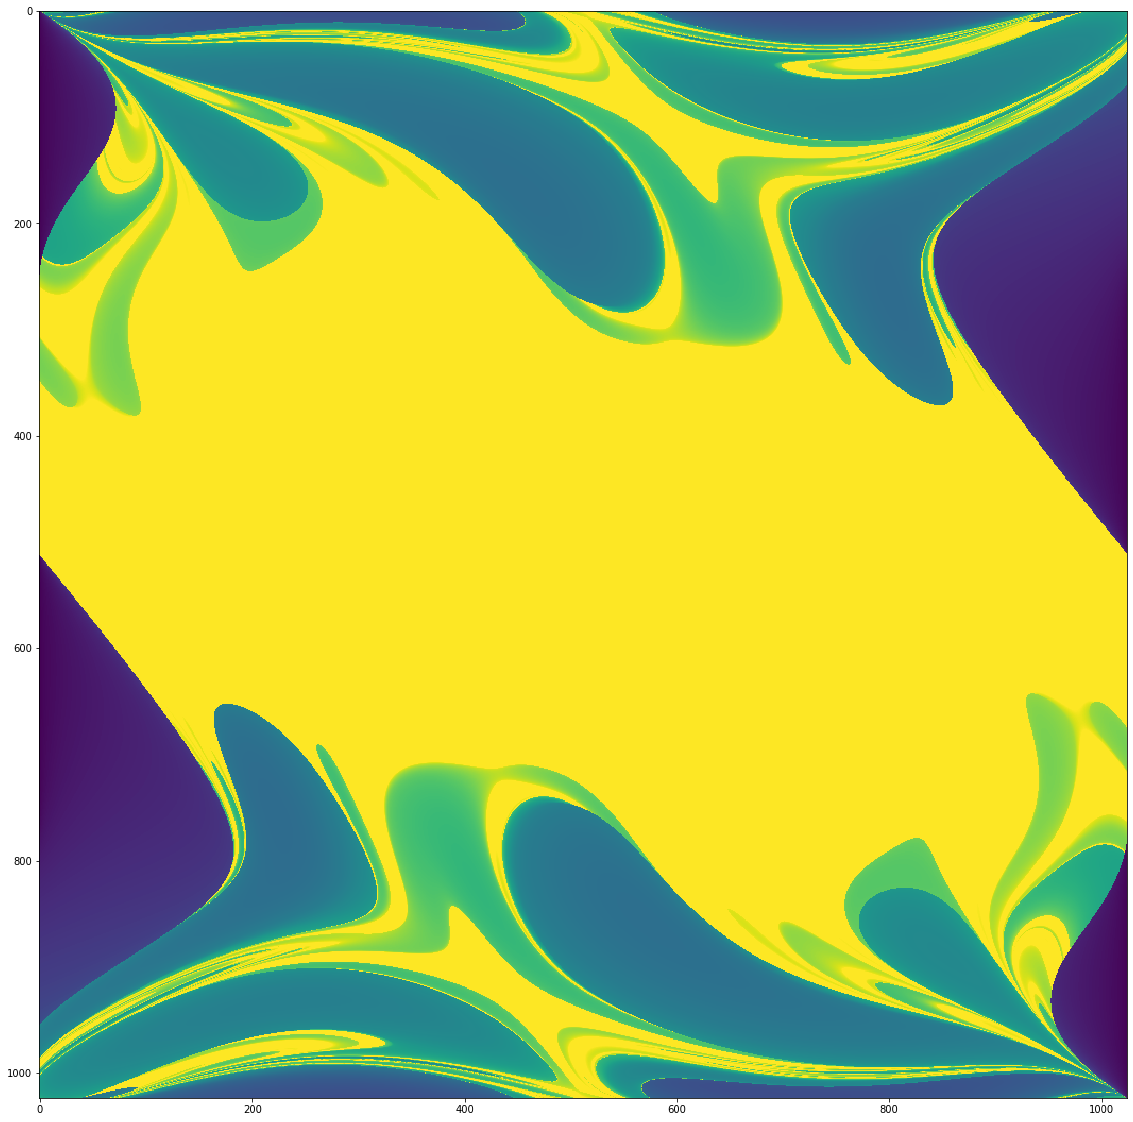

In [63]:
plt.figure (figsize=(20,20))
plt.imshow(arr)

In [68]:
grids = [{}]*20

In [ ]:
unprocessed = []

In [707]:
def simplify_loc (loc):
    if loc[1] % 2 == 0 and loc[2] % 2 == 0 and loc[0] > 0:
        return simplify_loc((loc[0]-1, loc[1]//2, loc[2]//2))
    else:
        return loc

def location_to_2d (loc, size=(6.28, 6.28)):
    return [loc[1] / 2.**loc[0] * size[0], loc[2] / 2.**loc[0] * size[1]]

In [585]:
neighbourhood_sub_grid = [0, 0, 4]

def get_neighbourhood (loc, half_sizes = neighbourhood_sub_grid):
    
    neighbourhood = set()
    
    for extra_depth, half_size in enumerate(half_sizes, 1):
        depth = loc[0] + extra_depth
        
        x, y = np.indices((half_size * 2 + 1, half_size * 2 + 1)) - half_size
        x = x + loc[1] * 2
        y = y + loc[2] * 2
        
        neighbourhood |= set(map(lambda xy: simplify_loc((depth,) + xy), zip(x.ravel(), y.ravel())))
    
    return list(neighbourhood)

def get_sub_grid (loc, depth, extra_padding = 0):
    half_size = 2**(depth-1) + extra_padding
    
    x, y = np.indices((half_size * 2 + 1, half_size * 2 + 1)) - half_size
    depth_arr = np.ones_like (x) * (loc[0] + depth)
    
    x += loc[1] * 2**depth
    y += loc[2] * 2**depth
    
    return np.apply_along_axis(simplify_loc, 2, np.dstack ((depth_arr, x,y)))

In [586]:
get_sub_grid ((1,1,0), 1)

array([[[ 2,  1, -1],
        [ 2,  1,  0],
        [ 2,  1,  1]],

       [[ 2,  2, -1],
        [ 1,  1,  0],
        [ 2,  2,  1]],

       [[ 2,  3, -1],
        [ 2,  3,  0],
        [ 2,  3,  1]]])

In [313]:
get_neighbourhood ((1, 0, 0), [1])

[(2, -1, 1),
 (2, 1, 0),
 (2, 0, -1),
 (2, -1, 0),
 (2, 1, 1),
 (2, 1, -1),
 (0, 0, 0),
 (2, 0, 1),
 (2, -1, -1)]

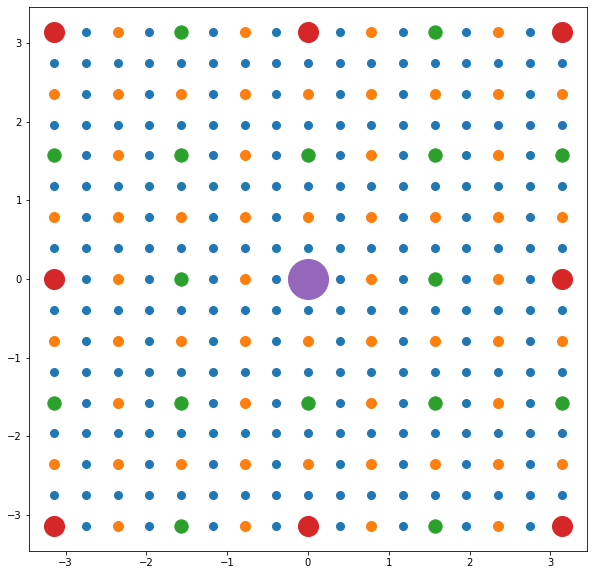

In [668]:
plt.figure (figsize=(10,10))

for d in reversed(range(4)):
    points = np.array(list(map(location_to_2d, get_neighbourhood ((0,0,0), [0]*d + [2**d]))))
    plt.plot (points[:, 0], points[:, 1], "o", markersize=40/(d+2))

plt.plot (0, 0, "o", markersize=40);

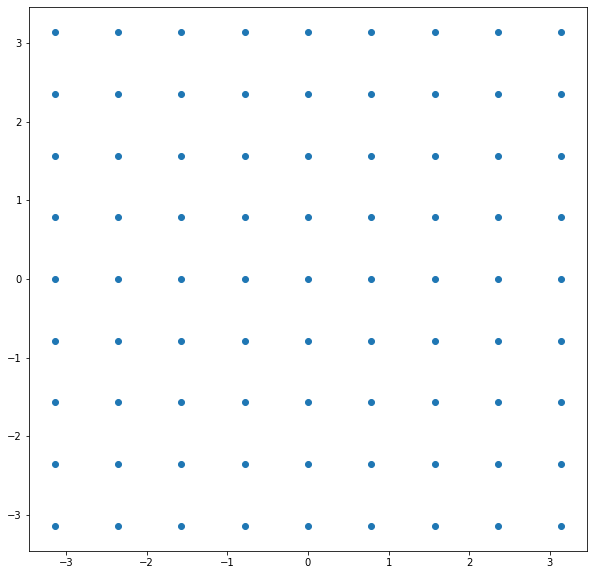

In [669]:
plt.figure (figsize=(10,10))

points = np.array(list(map(location_to_2d, get_neighbourhood ((0,0,0), [0, 0, 4]))))
plt.scatter (points[:, 0], points[:, 1])

In [720]:
kernel_half_size = 1
correlation_kernel = -1 * np.ones ((kernel_half_size * 2 + 1, kernel_half_size * 2 + 1))
correlation_kernel[kernel_half_size, kernel_half_size] = (2*kernel_half_size+1)**2 - 1

def find_edges (neighbourhood_results):
    return correlate (neighbourhood_results, correlation_kernel) != 0

def register_edges (set_of_edge_locs):
    global unprocessed
    unprocessed |= set_of_edge_locs

def process_location (loc):
    global processing, results
    
    if loc not in results:
        processing.add (loc)
        return
    
    if loc in processing:
        print ("debug: already in processing")
        return
    
    neighbourhood = get_sub_grid (loc, 3, extra_padding = kernel_half_size)
    
    length = neighbourhood.shape[0]
    neighbourhood_list = neighbourhood.reshape ((length**2, 3))
    
    missing_bools = list(map(lambda l: tuple(l) not in results, neighbourhood_list))
    
    if np.any (missing_bools):
        processing |= set(map(tuple, compress(neighbourhood_list, missing_bools)))
        return
    
    neighbourhood_results = np.array([results[tuple(loc)] for loc in neighbourhood_list]).reshape ((length, length))
    
    is_on_edge = find_edges (neighbourhood_results)
    
    register_edges (set(map(tuple, neighbourhood[is_on_edge])))
    
    unprocessed.remove (loc)

In [721]:
print ("processing:", len(processing))
print ("unprocessed:", len(unprocessed))
print ("results:", len(results))

processing: 0
unprocessed: 0
results: 5449


In [722]:
for loc in get_neighbourhood ((0,0,0), [0,0,5]):
    results[loc] = 1

In [723]:
results[(0,0,0)] = 0

In [745]:
processing = set ()
unprocessed = set (map(tuple, get_sub_grid ((0,0,0), 3).reshape(((2**3+1)**2, 3))))
results = {}

for _ in range(1):
    processing = set ()
    
    for loc in unprocessed.copy():
        process_location (loc)
    
    if len(processing) == 0:
        break
    
    print ("Sending %i points" % len(processing))
    results.update(run_simu (list(processing)))

Sending 81 points
Reading 81 lines


In [746]:
len(unprocessed)

81

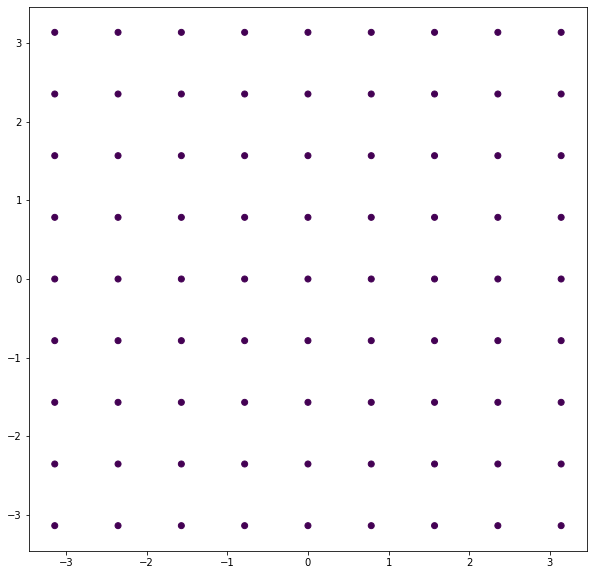

In [747]:
plt.figure (figsize=(10,10))

pts = np.array(list(map(location_to_2d, list(results.keys()))))
plt.scatter (pts[:,0], pts[:,1], c=list(results.values()))